Absorption coefficients are stored in `all_data.csv` for different energy levels and battery states. We plot them.

Load csv file

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "../data/multienergy/all_data.csv"
df = pd.read_csv(file_path)

df

,Energy/eV_x = 1.0,Absorbance_x = 1.0,Energy/eV_x = 0.95,Absorbance_x = 0.95,Energy/eV_x = 0.9,Absorbance_x = 0.9,Energy/eV_x = 0.85,Absorbance_x = 0.85,Energy/eV_x = 0.8,Absorbance_x = 0.8,...,Energy/eV_x = 0.7,Absorbance_x = 0.7,Energy/eV_x = 0.65,Absorbance_x = 0.65,Energy/eV_x = 0.6,Absorbance_x = 0.6,Energy/eV_x = 0.55,Absorbance_x = 0.55,Energy/eV_x = 0.5,Absorbance_x = 0.5
0,8204.349144,0.397735,8204.983474,0.228156,8204.943104,0.236052,8205.006542,0.212369,8204.960405,0.247300,...,8204.977706,0.242424,8204.885434,0.262934,8205.041145,0.235926,8206.125521,0.287410,8204.908502,0.399563
1,8204.441404,0.398373,8205.087283,0.228485,8205.052679,0.234788,8205.110352,0.212959,8205.064214,0.245869,...,8205.087283,0.242423,8204.995008,0.263119,8205.144955,0.235720,8206.212053,0.288274,8205.012309,0.401326
2,8204.533666,0.398528,8205.191094,0.228277,8205.162257,0.234729,8205.214164,0.212186,8205.168025,0.247321,...,8205.185327,0.241688,8205.104584,0.262020,8205.248769,0.236199,8206.304356,0.288289,8205.121886,0.399190
3,8204.625930,0.399121,8205.289141,0.227971,8205.260304,0.234371,8205.317979,0.212084,8205.271839,0.246071,...,8205.289141,0.241312,8205.208396,0.263662,8205.346817,0.234952,8206.408200,0.286463,8205.219931,0.398731
4,8204.735496,0.398314,8205.392958,0.227888,8205.358352,0.234616,8205.416029,0.211794,8205.369887,0.246516,...,8205.387190,0.242198,8205.300676,0.263651,8205.439100,0.235236,8206.512046,0.287292,8205.323746,0.401107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7934,9058.712501,-0.002077,9059.497172,-0.001970,9059.461823,0.000064,9059.518381,-0.000568,9059.483032,0.001443,...,9059.504242,0.000248,9059.384058,-0.000692,9059.567870,0.000342,9060.982065,0.002032,9059.398197,-0.001576
7935,9058.712501,0.000910,9059.497172,-0.001319,9059.461823,0.001261,9059.518381,-0.000039,9059.483032,0.001204,...,9059.504242,0.000406,9059.384058,0.000551,9059.567870,0.000502,9060.982065,-0.000372,9059.398197,-0.002389
7936,9058.712501,0.000670,9059.497172,-0.000297,9059.461823,0.000828,9059.518381,-0.000522,9059.483032,0.001273,...,9059.504242,0.000847,9059.384058,-0.000075,9059.567870,0.000426,9060.982065,0.001386,9059.398197,-0.001313
7937,9058.712501,-0.001061,9059.497172,-0.001051,9059.461823,-0.000151,9059.518381,-0.000134,9059.483032,-0.000724,...,9059.504242,-0.000279,9059.384058,-0.000854,9059.567870,0.000531,9060.982065,0.000480,9059.398197,-0.000278


Extract unique battery states from the columns

In [2]:
states = [col.split('_')[1] for col in df.columns if 'Energy/eV_' in col]

states

['x = 1.0',
 'x = 0.95',
 'x = 0.9',
 'x = 0.85',
 'x = 0.8',
 'x = 0.75',
 'x = 0.7',
 'x = 0.65',
 'x = 0.6',
 'x = 0.55',
 'x = 0.5']

Plot the data for each state

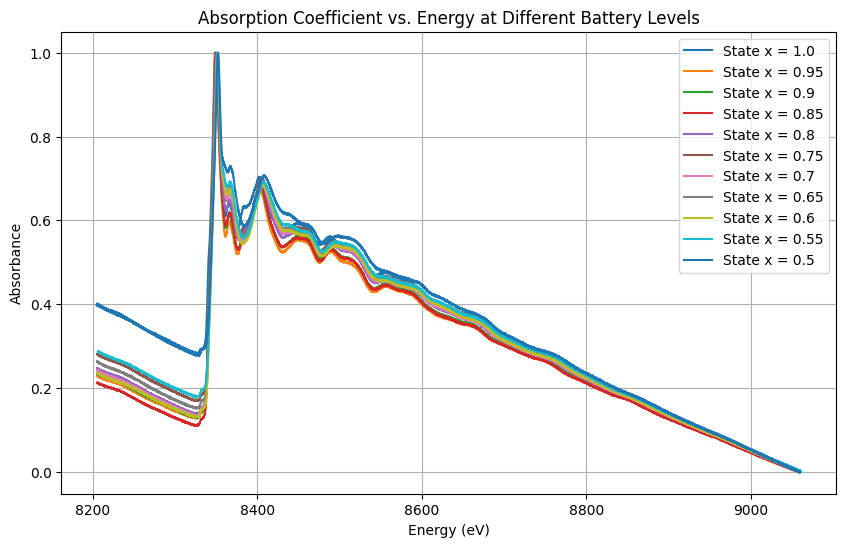

In [8]:
plt.figure(figsize=(10, 6))

for state in states:
    energy_col = f"Energy/eV_{state}"
    absorbance_col = f"Absorbance_{state}"
    if energy_col in df.columns and absorbance_col in df.columns:
        plt.plot(df[energy_col], df[absorbance_col], label=f"State {state}")

plt.title("Absorption Coefficient vs. Energy at Different Battery Levels")
plt.xlabel("Energy (eV)")
plt.ylabel("Absorbance")
plt.legend()
plt.grid(True)
plt.show()

For each battery level, we identify the energy level that has maximum absorption (=1).

In [9]:
# Find energy level with maximum absorption for each battery level
results = {}
for state in states:
    energy_col = f"Energy/eV_{state}"
    absorbance_col = f"Absorbance_{state}"
    if energy_col in df.columns and absorbance_col in df.columns:
        # Find the row where absorbance is 1 (or closest to 1 if exact 1 doesn't exist)
        max_row = df.loc[df[absorbance_col].idxmax()]
        energy_max = max_row[energy_col]
        absorbance_max = max_row[absorbance_col]
        results[state] = (energy_max, absorbance_max)

# Display the results
for state, (energy, absorbance) in results.items():
    print(f"Battery Level {state}: Energy = {energy:.3f} eV, Absorbance = {absorbance:.3f}")

Battery Level x = 1.0: Energy = 8348.519 eV, Absorbance = 1.000
Battery Level x = 0.95: Energy = 8348.836 eV, Absorbance = 1.000
Battery Level x = 0.9: Energy = 8349.249 eV, Absorbance = 1.000
Battery Level x = 0.85: Energy = 8349.302 eV, Absorbance = 1.000
Battery Level x = 0.8: Energy = 8350.187 eV, Absorbance = 1.000
Battery Level x = 0.75: Energy = 8350.373 eV, Absorbance = 1.000
Battery Level x = 0.7: Energy = 8350.881 eV, Absorbance = 1.000
Battery Level x = 0.65: Energy = 8351.395 eV, Absorbance = 1.000
Battery Level x = 0.6: Energy = 8351.551 eV, Absorbance = 1.000
Battery Level x = 0.55: Energy = 8351.491 eV, Absorbance = 1.000
Battery Level x = 0.5: Energy = 8352.089 eV, Absorbance = 1.000


In [10]:
results

{'x = 1.0': (8348.519376804781, 1.0),
 'x = 0.95': (8348.836165049866, 1.0),
 'x = 0.9': (8349.248624577953, 1.0),
 'x = 0.85': (8349.302426740649, 1.0),
 'x = 0.8': (8350.187275837457, 1.0),
 'x = 0.75': (8350.37264031362, 1.0),
 'x = 0.7': (8350.88094122423, 1.0),
 'x = 0.65': (8351.39528699868, 1.0),
 'x = 0.6': (8351.550799727684, 1.0),
 'x = 0.55': (8351.490986433853, 1.0),
 'x = 0.5': (8352.089159073948, 1.0)}

Extract battery levels (x) and corresponding energy levels

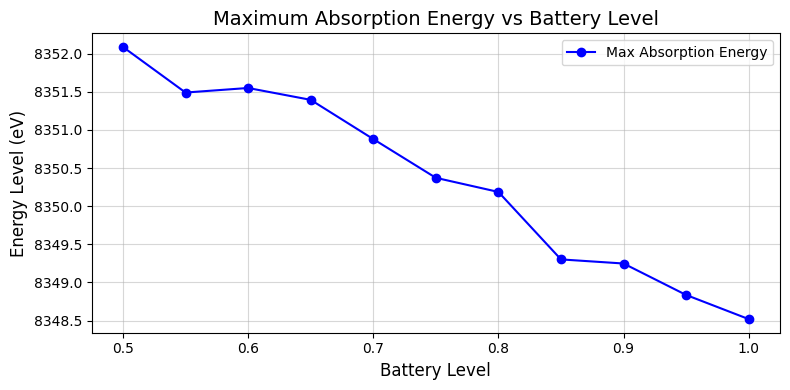

In [12]:
battery_levels = [float(key.split('=')[1].strip()) for key in results.keys()]
energy_levels = [value[0] for value in results.values()]

plt.figure(figsize=(8, 4))
plt.plot(battery_levels, energy_levels, marker='o', linestyle='-', color='b', label="Max Absorption Energy")
plt.xlabel("Battery Level", fontsize=12)
plt.ylabel("Energy Level (eV)", fontsize=12)
plt.title("Maximum Absorption Energy vs Battery Level", fontsize=14)
plt.grid(alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()